In [12]:
# Goal: compile the most common value per attribute
# This will tell us what the most common 'Aircraft', 'Location', 'Time' etc... 
# is within this accident dataset.
# By sorting these we can then try to see whether the top value from each attribute seems to 
# show up significantly more than others

# While this is not entirely significant, due to no way to normalize the data,
# it is interesting to see and can act as a starting point for further analysis:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('AIDS_REPORTS.csv')
df
list(df)

c:\users\rickyf~1\desktop\cs506env\env\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['AIDS Report Number',
 'Local Event Date',
 'Event City',
 'Event State',
 'Event Airport',
 'Event Type',
 'Aircraft Damage',
 'Flight Phase',
 'Aircraft Make',
 'Aircraft Model',
 'Aircraft Series',
 'Operator',
 'Primary Flight Type',
 'Flight Conduct Code',
 'Flight Plan Filed Code',
 'Aircraft Registration Nbr',
 'Total Fatalities',
 'Total Injuries',
 'Aircraft Engine Make',
 'Aircraft Engine Model',
 'Engine Group Code',
 'Nbr of Engines',
 'PIC Certificate Type',
 'PIC Flight Time Total Hrs',
 'PIC Flight Time Total Make-Model',
 ' ',
 ' .1']

In [13]:
df['Aircraft Make'].value_counts()[0:3] #look at top 3

CESSNA    26571
PIPER     17602
BEECH      9943
Name: Aircraft Make, dtype: int64

In [14]:
# removing irrelevant columns:
columns = list(df.columns)
columns.remove('AIDS Report Number')
columns.remove(' ')
columns.remove(' .1')
columns.remove('Aircraft Registration Nbr')
columns.remove('Total Fatalities')
columns.remove('Local Event Date')
columns.remove('Event Type')
columns.remove('Total Injuries')
#columns.remove('')
#print(columns)

In [31]:
for col in columns:
    top3 = df[col].value_counts().head(10)
    print('For {}, the top 3 are:'.format(col))
    print('{}'.format(top3))
    print("")

For Event City, the top 3 are:
CHICAGO         1817
HOUSTON         1007
KANSAS CITY      982
SAINT LOUIS      862
PITTSBURGH       828
ROCHESTER        774
DENVER           743
LAS VEGAS        670
INDIANAPOLIS     666
DALLAS           655
Name: Event City, dtype: int64

For Event State, the top 3 are:
CA    10377
TX     7639
FL     6297
NY     5036
IL     4023
PA     3525
OH     3203
AK     3190
MO     2973
MI     2870
Name: Event State, dtype: int64

For Event Airport, the top 3 are:
CHICAGO O'HARE INTL                   1272
KANSAS CITY INTL                       728
LAMBERT-ST LOUIS INTL                  702
PITTSBURGH INTL                        641
GENERAL EDWARD LAWRENCE LOGAN INTL     620
GREATER ROCHESTER INTL                 549
EPPLEY AIRFIELD                        525
SYRACUSE HANCOCK INTL                  512
INDIANAPOLIS INTL                      499
SALT LAKE CITY INTL                    482
Name: Event Airport, dtype: int64

For Aircraft Damage, the top 3 are:
MINOR  

In [16]:
# x = df['Nbr of Engines'].value_counts()
# x.head(3)

In [17]:
airmake = df['Aircraft Make'].value_counts().head(1)
print(airmake)
print(airmake.index[0])
print(airmake[0])
#str(df['Aircraft Make'].value_counts().head(1)[0])

CESSNA    26571
Name: Aircraft Make, dtype: int64
CESSNA
26571


In [18]:
eng = df['Nbr of Engines'].value_counts().head(1)
print(eng)
print(eng.index[0])
print(eng[1])

1.0    54754
Name: Nbr of Engines, dtype: int64
1.0
54754


In [19]:
Dict = {}
for col in columns:
    cur = df[col].value_counts()
    curind = cur.index[0]
    curnum = cur[0]
    key = col + ' , ' + str(curind) + ':'
    Dict[key] = (curnum)
    #Dict[col] = (curind,curnum)
Dict

{'Event City , CHICAGO:': 1817,
 'Event State , CA:': 10377,
 "Event Airport , CHICAGO O'HARE INTL:": 1272,
 'Aircraft Damage , MINOR:': 65337,
 'Flight Phase , LEVEL OFF TOUCHDOWN:': 17084,
 'Aircraft Make , CESSNA:': 26571,
 'Aircraft Model , CE-172:': 5382,
 'Aircraft Series , 200:': 4016,
 'Operator , AMERICAN AIRLINES INC:': 1509,
 'Primary Flight Type , PERSONAL:': 40544,
 'Flight Conduct Code , GENERAL OPERATING RULES:': 69912,
 'Flight Plan Filed Code , NONE:': 35771,
 'Aircraft Engine Make , LYC:': 10655,
 'Aircraft Engine Model , O235L2C:': 1042,
 'Engine Group Code , O360:': 4135,
 'Nbr of Engines , 1.0:': 871,
 'PIC Certificate Type , PRIVATE PILOT:': 29963,
 'PIC Flight Time Total Hrs , 0.0:': 1712,
 'PIC Flight Time Total Make-Model , 0.0:': 8543}

<BarContainer object of 19 artists>

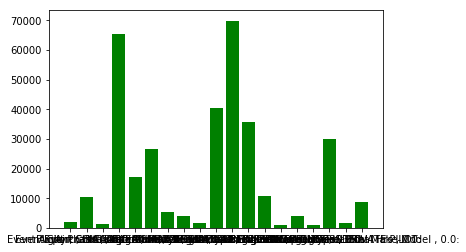

In [24]:
plt.bar(Dict.keys(), Dict.values(), color='g')

In [9]:
s = [(k, Dict[k]) for k in sorted(Dict, key=Dict.get, reverse=True)]
for k, v in s:
    print(k,v)

Flight Conduct Code , GENERAL OPERATING RULES: 69912
Aircraft Damage , MINOR: 65337
Primary Flight Type , PERSONAL: 40544
Flight Plan Filed Code , NONE: 35771
PIC Certificate Type , PRIVATE PILOT: 29963
Aircraft Make , CESSNA: 26571
Flight Phase , LEVEL OFF TOUCHDOWN: 17084
Aircraft Engine Make , LYC: 10655
Event State , CA: 10377
PIC Flight Time Total Make-Model , 0.0: 8543
Aircraft Model , CE-172: 5382
Engine Group Code , O360: 4135
Aircraft Series , 200: 4016
Event City , CHICAGO: 1817
PIC Flight Time Total Hrs , 0.0: 1712
Operator , AMERICAN AIRLINES INC: 1509
Event Airport , CHICAGO O'HARE INTL: 1272
Aircraft Engine Model , O235L2C: 1042
Nbr of Engines , 1.0: 871


In [10]:
print(s)

[('Flight Conduct Code , GENERAL OPERATING RULES:', 69912), ('Aircraft Damage , MINOR:', 65337), ('Primary Flight Type , PERSONAL:', 40544), ('Flight Plan Filed Code , NONE:', 35771), ('PIC Certificate Type , PRIVATE PILOT:', 29963), ('Aircraft Make , CESSNA:', 26571), ('Flight Phase , LEVEL OFF TOUCHDOWN:', 17084), ('Aircraft Engine Make , LYC:', 10655), ('Event State , CA:', 10377), ('PIC Flight Time Total Make-Model , 0.0:', 8543), ('Aircraft Model , CE-172:', 5382), ('Engine Group Code , O360:', 4135), ('Aircraft Series , 200:', 4016), ('Event City , CHICAGO:', 1817), ('PIC Flight Time Total Hrs , 0.0:', 1712), ('Operator , AMERICAN AIRLINES INC:', 1509), ("Event Airport , CHICAGO O'HARE INTL:", 1272), ('Aircraft Engine Model , O235L2C:', 1042), ('Nbr of Engines , 1.0:', 871)]
